# MODULE 2

## Machine Learning for Regression

### 2.1 Car price Prediction Project
____

 **Data preparation – General Information**

In the data preparation phase, several important steps need to be followed to ensure the dataset is suitable for analysis and modeling. Here are some key considerations:

1. **Data Cleaning**: This involves handling missing values, dealing with outliers, and ensuring consistency in data formats. Missing values can be imputed using various techniques, such as mean/median imputation or using advanced methods like K-nearest neighbors. Outliers may need to be addressed by either removing them or transforming them to fall within a reasonable range.

2. **Data Integration**: If you have multiple datasets related to car prices, you may need to combine them into a single dataset. This can involve matching and merging records based on common identifiers or performing data joins based on shared attributes.

3. **Data Transformation**: Sometimes, the existing variables may not be in a suitable format for analysis. In such cases, feature engineering techniques can be applied to create new variables that may have a better relationship with the target variable, such as transforming categorical variables into numerical ones using one-hot encoding or label encoding.

4. **Feature Scaling**: It is crucial to make sure that the features are on a similar scale to avoid bias in the model. Common techniques for feature scaling include standardization (mean of 0 and standard deviation of 1) or normalization (scaling values between 0 and 1).

5. **Train-Validation** **Split**: Before building the predictive model, it is essential to split the dataset into training and validating subsets. Typically, the majority of the data is used for training, while a smaller portion is reserved for evaluating the model’s performance. As I mentioned in past articles, a train-validate-test split might provide more reliable results.

By following these steps diligently, you can ensure that the data is well-prepared and ready for the subsequent stages of the car price prediction project.

### 2.2 DATA PREPARATION 
____

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [537]:
# Read the data into a DataFrame
df = pd.read_csv('CH2-MLdata.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [538]:
# we use the d.columns to get the columns in the dataset
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [539]:
# We can use .str.lower() to convert all column headers to lowercase
df.columns.str.lower()

Index(['make', 'model', 'year', 'engine fuel type', 'engine hp',
       'engine cylinders', 'transmission type', 'driven_wheels',
       'number of doors', 'market category', 'vehicle size', 'vehicle style',
       'highway mpg', 'city mpg', 'popularity', 'msrp'],
      dtype='object')

In [540]:
# in addtion to the above, we can use the .str.replace() to replace spaces with underscores
df.columns.str.lower().str.replace(' ', '_')

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [541]:
# We assigned the above to the columns attribute of the dataframe
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


Comparing the data with the previous one, it obvious that the columns are now uniform as the previous one had some columns with different space and underscore. The data is now clean and ready for analysis.

In [542]:
# çhecking the data types of the columns. We can use the .dtypes attribute.
# object means string (categories or text),
# int64 means integer, float64 means float (decimal numbers

df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [543]:
# identify the categorical columns
# Set data which are object(categorica) to indicates Trues
df.dtypes == 'object'

make                  True
model                 True
year                 False
engine_fuel_type      True
engine_hp            False
engine_cylinders     False
transmission_type     True
driven_wheels         True
number_of_doors      False
market_category       True
vehicle_size          True
vehicle_style         True
highway_mpg          False
city_mpg             False
popularity           False
msrp                 False
dtype: bool

In [544]:
# we want to get the columns that are of object datatype
df.dtypes[df.dtypes == 'object']

make                 object
model                object
engine_fuel_type     object
transmission_type    object
driven_wheels        object
market_category      object
vehicle_size         object
vehicle_style        object
dtype: object

In [545]:
# To get the index of the columns that are of object datatype
df.dtypes[df.dtypes == 'object'].index

Index(['make', 'model', 'engine_fuel_type', 'transmission_type',
       'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style'],
      dtype='object')

In [546]:
df.select_dtypes(include=['object'])

,make,model,engine_fuel_type,transmission_type,driven_wheels,market_category,vehicle_size,vehicle_style
0,BMW,1 Series M,premium unleaded (required),MANUAL,rear wheel drive,"Factory Tuner,Luxury,High-Performance",Compact,Coupe
1,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,"Luxury,Performance",Compact,Convertible
2,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,"Luxury,High-Performance",Compact,Coupe
3,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,"Luxury,Performance",Compact,Coupe
4,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,Luxury,Compact,Convertible
...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,premium unleaded (required),AUTOMATIC,all wheel drive,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback
11910,Acura,ZDX,premium unleaded (required),AUTOMATIC,all wheel drive,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback
11911,Acura,ZDX,premium unleaded (required),AUTOMATIC,all wheel drive,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback
11912,Acura,ZDX,premium unleaded (recommended),AUTOMATIC,all wheel drive,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback


In [547]:
# After getting the index of the columns that are of object datatype,we can canvert it to a list
# and assign it to a variable

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)
categorical_columns

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [548]:
# This is to convert the content of categorical columns to lowercase and replace spaces with underscores

for col in categorical_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [549]:
# list of the categorical columns
df[categorical_columns].head()

,make,model,engine_fuel_type,transmission_type,driven_wheels,market_category,vehicle_size,vehicle_style
0,bmw,1_series_m,premium_unleaded_(required),manual,rear_wheel_drive,"factory_tuner,luxury,high-performance",compact,coupe
1,bmw,1_series,premium_unleaded_(required),manual,rear_wheel_drive,"luxury,performance",compact,convertible
2,bmw,1_series,premium_unleaded_(required),manual,rear_wheel_drive,"luxury,high-performance",compact,coupe
3,bmw,1_series,premium_unleaded_(required),manual,rear_wheel_drive,"luxury,performance",compact,coupe
4,bmw,1_series,premium_unleaded_(required),manual,rear_wheel_drive,luxury,compact,convertible


In [550]:
# all the columns in the dataset(both categorical and numerical)
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [551]:
# Checking the data types of the columns
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

### 2.3 EXPLORATORY DATA ANALYSIS
___

After understanding the data, we can now proceed to the next step which is the exploratory data analysis. This is the process of analyzing data sets to summarize their main characteristics often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task. Exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics, often with visual methods.

In [552]:
# Listing all the columns in the dataset
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [553]:
# Checking each columns to undertsand the unique values in each column.
# We will write a function to do this:

for col in df.columns:
    print(col)
    print(df[col].head())
    print()

make
0    bmw
1    bmw
2    bmw
3    bmw
4    bmw
Name: make, dtype: object

model
0    1_series_m
1      1_series
2      1_series
3      1_series
4      1_series
Name: model, dtype: object

year
0    2011
1    2011
2    2011
3    2011
4    2011
Name: year, dtype: int64

engine_fuel_type
0    premium_unleaded_(required)
1    premium_unleaded_(required)
2    premium_unleaded_(required)
3    premium_unleaded_(required)
4    premium_unleaded_(required)
Name: engine_fuel_type, dtype: object

engine_hp
0    335.0
1    300.0
2    300.0
3    230.0
4    230.0
Name: engine_hp, dtype: float64

engine_cylinders
0    6.0
1    6.0
2    6.0
3    6.0
4    6.0
Name: engine_cylinders, dtype: float64

transmission_type
0    manual
1    manual
2    manual
3    manual
4    manual
Name: transmission_type, dtype: object

driven_wheels
0    rear_wheel_drive
1    rear_wheel_drive
2    rear_wheel_drive
3    rear_wheel_drive
4    rear_wheel_drive
Name: driven_wheels, dtype: object

number_of_doors
0    2.0
1   

In [554]:
# We can also use the .nunique() method to get the number of unique values in each column
df.nunique()

make                   48
model                 914
year                   28
engine_fuel_type       10
engine_hp             356
engine_cylinders        9
transmission_type       5
driven_wheels           4
number_of_doors         3
market_category        71
vehicle_size            3
vehicle_style          16
highway_mpg            59
city_mpg               69
popularity             48
msrp                 6049
dtype: int64

In [555]:
# Checking for the unique values in the make column

for col in df.columns:
    print(col)
    print(df[col].unique()[:5]) # first 5 unique values
    print(df[col].nunique()) # number of unique values
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

<Axes: xlabel='msrp', ylabel='Count'>

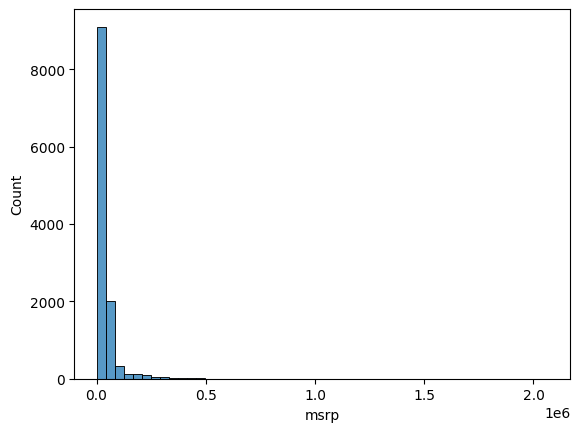

In [556]:
# We can use the sns.histplot() to plot a histogram of the msrp column
sns.histplot(df.msrp, bins=50)

considering that the x-axis is the price of the cars and the y-axis is the frequency of the cars, we can see that the price of the cars is right-skewed. This means that the majority of the cars are cheap and only a few are expensive. The focus will be to further examined those cars on the right side of the graph.

<Axes: xlabel='msrp', ylabel='Count'>

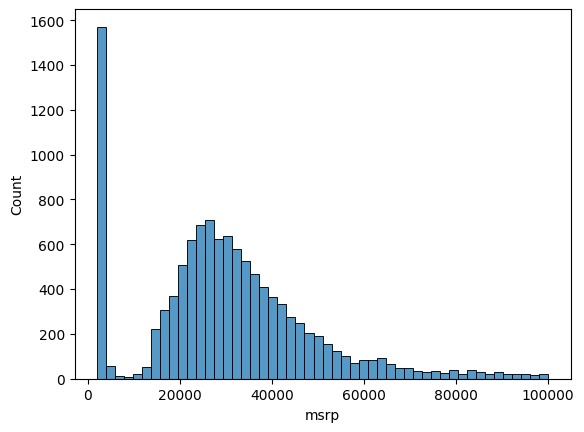

In [557]:
# examing those cars with msrp less than 100,000 in the right tail of the histogram
sns.histplot(df.msrp[df.msrp < 100000], bins=50)

#### Using log transformation to normalise the data

In [558]:
# using the log scale to plot the histogram
price_logs = np.log1p(df.msrp)

<Axes: xlabel='msrp', ylabel='Count'>

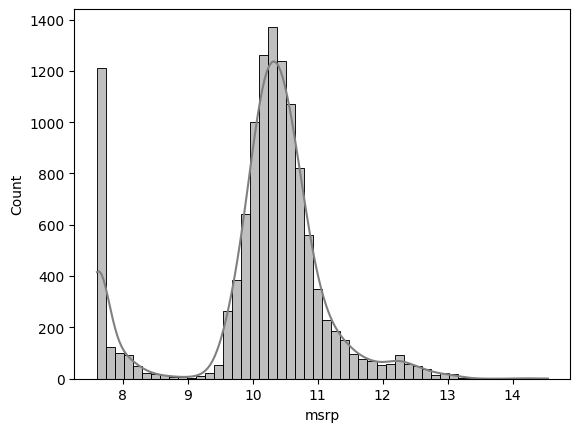

In [559]:
# Checking the histogram of the price_logs
sns.histplot(price_logs, bins=50, color='grey', kde=True)


The log transformation is a powerful tool for dealing with skewed data. This is because the logarithm of a value increases slowly if the original value is small, and increases quickly if the original value is large. This makes highly skewed distributions easier to handle.

#### Missing values

In [560]:
# checking for the missing values in the dataset
df.isnull()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11910,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11911,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11912,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [561]:
# Summing the missing values in the dataset
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

### 2.4 SETTING UP THE VALIDATION FRAMEWORK
___

The purpose of developing framework is to divide our data set into the training, validation and test set. 

The training set is used to train the model, the validation set is used to validate the model and the test set is used to test the model. The validation set is used to tune the hyperparameters of the model. 

The test set is used to evaluate the model. The validation set is used to tune the hyperparameters of the model. The test set is used to evaluate the model.

Usually,
- 60% of the data is used for training* 
- 20% of the data is used for validation*
- 20% of the data is used for testing*

In [562]:
# check the count of the data set
len(df)

11914

In [563]:
# We will need to confirm what is the 20% of the dataset, and turn it to an integer
len(df) * 0.2 # 20% of the dataset

# We can use the int() function to convert the float value to an integer
int(len(df) * 0.2) # 20% of the dataset with the interger value

2382

To prepare the data for the model, we will use the following steps:

In [564]:
n = len(df) # total number of samples
n_val = int(n * 0.2) # 20% of the dataset
n_test = int(n * 0.2) # 20% of the dataset
n_train = n - (n_val) - (n_test) # 60% of the dataset

# We will print the values of the n_train, n_val, n_test
print('The val_data:', n_val)
print('The test_data:', n_test)
print('The train_dataset:', n_train)


# confirming the sum of the three values
print('The total data;', n_train + n_val + n_test)


The val_data: 2382
The test_data: 2382
The train_dataset: 7150
The total data; 11914


Without shuffling the dataset, we can split the dataset into three parts: train, validation, and test. However, this method is not recommended because the data is ordered by the price of the cars. This means that the training set will contain only cheap cars, the validation set will contain only medium-priced cars, and the test set will contain only expensive cars. This will result in a model that is not generalizable.

See example of un-shuffled data below:

In [565]:
df_val_1 = df[:n_val] # first 20% of the dataset (1 - 2382)
df_test_1 = df[n_val: n_val + n_test] # next 20% of the dataset (2382 - 4764)
df_train_1 = df[n_val + n_test:] # remaining 60% of the dataset (4764 - 7146)


In [566]:
# checking the content of the df_val_1 dataset (first 20% of the dataset)
df_val_1.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [567]:
# checking the shape of the df_val_1 dataset (1 - 2382)
df_val_1.shape

(2382, 16)

In [568]:
# checking the content of the df_test_1 dataset (second 20% of the dataset)
df_test_1.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2382,porsche,cayenne,2017,premium_unleaded_(required),570.0,8.0,automatic,all_wheel_drive,4.0,"crossover,luxury,high-performance",midsize,4dr_suv,21,14,1715,159600
2383,porsche,cayenne,2017,premium_unleaded_(required),420.0,6.0,automatic,all_wheel_drive,4.0,"crossover,luxury,performance",midsize,4dr_suv,24,17,1715,76200
2384,porsche,cayman_s,2006,premium_unleaded_(required),295.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,26,18,1715,58900
2385,porsche,cayman,2014,premium_unleaded_(required),275.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,30,20,1715,52600
2386,porsche,cayman,2014,premium_unleaded_(required),325.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,1715,63800


In [569]:
# checking the shape of the df_val_1 dataset (2382 - 4764)
df_test_1.shape

(2382, 16)

In [570]:
# checking the content of the df_train_1 dataset (remaining 60% of the dataset)
df_train_1.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
4764,ford,flex,2016,regular_unleaded,287.0,6.0,automatic,front_wheel_drive,4.0,"crossover,performance",large,wagon,23,16,5657,37800
4765,ford,flex,2017,premium_unleaded_(recommended),365.0,6.0,automatic,all_wheel_drive,4.0,crossover,large,wagon,21,15,5657,43030
4766,ford,flex,2017,regular_unleaded,287.0,6.0,automatic,all_wheel_drive,4.0,"crossover,performance",large,wagon,22,16,5657,40180
4767,ford,flex,2017,regular_unleaded,287.0,6.0,automatic,front_wheel_drive,4.0,"crossover,performance",large,wagon,23,16,5657,32730
4768,ford,flex,2017,regular_unleaded,287.0,6.0,automatic,front_wheel_drive,4.0,"crossover,performance",large,wagon,23,16,5657,38230


In [571]:
# checking the shape of the df_train_1 dataset (4764 - 7146)
df_train_1.shape

(7150, 16)

#### Designing the reshufling of the data

Due to the fact that the data is ordered by the price of the cars, we need to shuffle the data before splitting it into the training, validation, and test sets. This will ensure that the data is randomly distributed across the three sets. Thus, we re-design the splitting of the data as follows:

- 60% of the data is used for training, and assign from 0 - 60% of the data to the training set
- 20% of the data is used for validation, and assign from 60 - 80% of the data to the validation set
- 20% of the data is used for testing, and assign from 80 - 100% of the data to the test set

Thus 
* df_train = 0 - 7150  
* df_val = 7150 - 9533  
* df_test = 9533 - 11916  

In [572]:
df_train = df.iloc[:n_train] # this is from the beginning to n_train (1- 7150)
df_val = df.iloc[n_train:n_train+n_val] # from n_train to n_train+n_val (7150 - (7150 + 2382)).
df_test = df.iloc[n_train+n_val:] # from n_train+n_val to the end

In [573]:
# checking the content of the df_train dataset (1 - 7150)
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,mazda,navajo,1994,regular_unleaded,160.0,6.0,manual,four_wheel_drive,2.0,NaN,compact,2dr_suv,18,14,586,2000
7146,mazda,navajo,1994,regular_unleaded,160.0,6.0,manual,four_wheel_drive,2.0,NaN,compact,2dr_suv,18,14,586,2000
7147,lincoln,navigator,2015,regular_unleaded,365.0,6.0,automatic,four_wheel_drive,4.0,luxury,large,4dr_suv,20,15,61,65055
7148,lincoln,navigator,2015,regular_unleaded,365.0,6.0,automatic,four_wheel_drive,4.0,luxury,large,4dr_suv,19,15,61,67220


In [574]:
# checking the shape of the df_train dataset (1 - 7150)
df_val

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
7150,lincoln,navigator,2015,regular_unleaded,365.0,6.0,automatic,rear_wheel_drive,4.0,luxury,large,4dr_suv,20,15,61,63645
7151,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,rear_wheel_drive,4.0,luxury,large,4dr_suv,22,16,61,63195
7152,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,four_wheel_drive,4.0,luxury,large,4dr_suv,19,15,61,76650
7153,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,four_wheel_drive,4.0,luxury,large,4dr_suv,19,15,61,69135
7154,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,rear_wheel_drive,4.0,luxury,large,4dr_suv,20,15,61,65560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527,chevrolet,silverado_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,22,17,1385,37380
9528,chevrolet,silverado_1500,2015,regular_unleaded,355.0,8.0,automatic,rear_wheel_drive,4.0,NaN,large,extended_cab_pickup,23,16,1385,40100
9529,chevrolet,silverado_1500,2015,regular_unleaded,355.0,8.0,automatic,rear_wheel_drive,4.0,NaN,large,crew_cab_pickup,23,16,1385,42560
9530,chevrolet,silverado_1500,2015,regular_unleaded,355.0,8.0,automatic,rear_wheel_drive,4.0,NaN,large,crew_cab_pickup,23,16,1385,42860


In [575]:
# checking the content of the df_val dataset (7150 - 9532)
df_test

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
9532,chevrolet,silverado_1500,2015,regular_unleaded,355.0,8.0,automatic,rear_wheel_drive,4.0,NaN,large,crew_cab_pickup,23,16,1385,47575
9533,chevrolet,silverado_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,rear_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,24,18,1385,31940
9534,chevrolet,silverado_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,rear_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,24,18,1385,38335
9535,chevrolet,silverado_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,rear_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,24,18,1385,35870
9536,chevrolet,silverado_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,rear_wheel_drive,2.0,flex_fuel,large,regular_cab_pickup,24,18,1385,28155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


In [576]:
# Turning the dataset (n) into nupy arrays, and assigning the values to the variables
idx = np.arange(n)

print(idx)

[    0     1     2 ... 11911 11912 11913]


In [577]:
# Shuffling the data, and setting the random seed to 2 for reproducibility
np.random.seed(2)
np.random.shuffle(idx)

In [578]:
# After the shuffling, we will apply the shuffling data set to the train, val and test data

df_train_s = df.iloc[idx[:n_train]]
df_val_s = df.iloc[idx[n_train:n_train+n_val]]
df_test_s = df.iloc[idx[n_train+n_val:]]

In [579]:
#  checcking the content of the train, val and test data compare to the previous data
df_train_s.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [580]:
df_val_s.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2779,chevrolet,colorado,2015,regular_unleaded,200.0,4.0,automatic,four_wheel_drive,4.0,NaN,compact,extended_cab_pickup,25,19,1385,26885
3708,mercedes-benz,e-class,2017,premium_unleaded_(required),241.0,4.0,automatic,all_wheel_drive,4.0,luxury,midsize,sedan,29,22,617,54650
4794,ford,focus,2017,flex-fuel_(unleaded/e85),160.0,4.0,manual,front_wheel_drive,4.0,flex_fuel,compact,sedan,36,26,5657,16775
10498,acura,tlx,2016,premium_unleaded_(recommended),290.0,6.0,automatic,front_wheel_drive,4.0,luxury,midsize,sedan,34,21,204,42600
1880,volkswagen,beetle_convertible,2016,regular_unleaded,170.0,4.0,automatic,front_wheel_drive,2.0,NaN,compact,convertible,34,25,873,25995


In [581]:
df_test_s.head()


,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
11195,gmc,vandura,1994,regular_unleaded,165.0,6.0,automatic,rear_wheel_drive,3.0,NaN,compact,cargo_van,20,15,549,2000
673,mercedes-benz,600-class,1993,regular_unleaded,389.0,12.0,automatic,rear_wheel_drive,2.0,luxury,large,coupe,15,11,617,3211
11270,toyota,venza,2013,regular_unleaded,268.0,6.0,automatic,all_wheel_drive,4.0,"crossover,performance",midsize,wagon,25,18,2031,31120
752,volvo,740,1992,regular_unleaded,114.0,4.0,automatic,rear_wheel_drive,4.0,luxury,midsize,sedan,26,18,870,2000
3137,ford,crown_victoria,2010,flex-fuel_(unleaded/e85),224.0,8.0,automatic,rear_wheel_drive,4.0,flex_fuel,large,sedan,24,16,5657,29905


In [582]:
# checking the length of the train, val and test data
len(df_train_s), len(df_val_s), len(df_test_s)

(7150, 2382, 2382)

After the shuffling of the data, it is important to reset the index of the data. This is because the index of the data is not in order after shuffling. The index of the data is important for the model to learn the data. To reset the index of the data, we can use the following code:

```python
df_train = df_train.reset_index(drop=True)
```


In [583]:
df_train_s = df_train_s.reset_index(drop=True)
df_val_s = df_val_s.reset_index(drop=True)
df_test_s = df_test_s.reset_index(drop=True)

In [584]:
# checking the impact of the reset_index on the train, val and test data
df_train_s

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,54900
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,29215
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,34675
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,303300


In [585]:
# checking the impact of the reset_index on the test, val and test data
df_test_s

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,gmc,vandura,1994,regular_unleaded,165.0,6.0,automatic,rear_wheel_drive,3.0,NaN,compact,cargo_van,20,15,549,2000
1,mercedes-benz,600-class,1993,regular_unleaded,389.0,12.0,automatic,rear_wheel_drive,2.0,luxury,large,coupe,15,11,617,3211
2,toyota,venza,2013,regular_unleaded,268.0,6.0,automatic,all_wheel_drive,4.0,"crossover,performance",midsize,wagon,25,18,2031,31120
3,volvo,740,1992,regular_unleaded,114.0,4.0,automatic,rear_wheel_drive,4.0,luxury,midsize,sedan,26,18,870,2000
4,ford,crown_victoria,2010,flex-fuel_(unleaded/e85),224.0,8.0,automatic,rear_wheel_drive,4.0,flex_fuel,large,sedan,24,16,5657,29905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2377,chevrolet,chevy_van,1998,regular_unleaded,200.0,6.0,automatic,rear_wheel_drive,3.0,NaN,midsize,cargo_van,18,13,1385,2052
2378,subaru,xv_crosstrek,2014,regular_unleaded,160.0,4.0,automatic,all_wheel_drive,4.0,"crossover,hybrid",compact,4dr_suv,33,29,640,25995
2379,dodge,magnum,2006,regular_unleaded,250.0,6.0,automatic,all_wheel_drive,4.0,NaN,large,wagon,22,15,1851,29100
2380,honda,civic,2016,regular_unleaded,174.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,42,31,2202,22200


In [586]:
# checking the impact of the reset_index on the train, val and test data
df_val_s

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,chevrolet,colorado,2015,regular_unleaded,200.0,4.0,automatic,four_wheel_drive,4.0,NaN,compact,extended_cab_pickup,25,19,1385,26885
1,mercedes-benz,e-class,2017,premium_unleaded_(required),241.0,4.0,automatic,all_wheel_drive,4.0,luxury,midsize,sedan,29,22,617,54650
2,ford,focus,2017,flex-fuel_(unleaded/e85),160.0,4.0,manual,front_wheel_drive,4.0,flex_fuel,compact,sedan,36,26,5657,16775
3,acura,tlx,2016,premium_unleaded_(recommended),290.0,6.0,automatic,front_wheel_drive,4.0,luxury,midsize,sedan,34,21,204,42600
4,volkswagen,beetle_convertible,2016,regular_unleaded,170.0,4.0,automatic,front_wheel_drive,2.0,NaN,compact,convertible,34,25,873,25995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2377,volvo,v60,2015,regular_unleaded,240.0,4.0,automatic,front_wheel_drive,4.0,luxury,midsize,wagon,37,25,870,35750
2378,maserati,granturismo_convertible,2015,premium_unleaded_(required),444.0,8.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,convertible,20,13,238,145740
2379,cadillac,escalade_hybrid,2013,regular_unleaded,332.0,8.0,automatic,rear_wheel_drive,4.0,"luxury,hybrid",large,4dr_suv,23,20,1624,74425
2380,mitsubishi,lancer,2016,regular_unleaded,148.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,34,24,436,17595


After the shuffling of the data, it is importaint to identify the column of the data that will be used as the target variable. The target variable is the variable that the model will predict. In this case, the target variable is the `price of the cars`. 

The target variable is important because it is the variable that the model will learn to predict. The target variable is usually the last column of the data.


In [587]:
# Checking the msrp column in the train data
# Checking the msrp column in the train data, and we can use either of the two methods below

# Method 1
df_train_s.msrp

# Method 2
df_train_s['msrp'].values


array([ 14410,  19685,  19795, ...,  34675, 303300,  37820])

In [588]:
# Checking the msrp column in the val data
df_val_s.msrp.values

array([26885, 54650, 16775, ..., 74425, 17595, 26700])

In [589]:
# Checking the msrp column in the test data
df_test_s.msrp.values

array([ 2000,  3211, 31120, ..., 29100, 22200, 32995])

In [590]:
# Converting msrp column into numpy log values to normalize the data, and assign the values to the variables
y_train = np.log1p(df_train_s.msrp.values)
y_val = np.log1p(df_val_s.msrp.values)
y_test = np.log1p(df_test_s.msrp.values)

In [591]:
y_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978])

We will delete the column of the target variable from the data. This is because the target variable is the variable that the model will learn to predict. The target variable is usually the last column of the data.

In [592]:
# deleting the msrp column from the train, val and test data
del df_train_s['msrp']
del df_val_s['msrp']
del df_test_s['msrp']

In [593]:
# Checking the train data after deleting the msrp column
df_train_s

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86


### 2.5 LINEAR REGRESSION
___

In [594]:
# Select the row at index 10 from the train data
# select some of features of the row at index 10 from the train data
df_train.iloc[10]

make                                         bmw
model                                   1_series
year                                        2013
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  300.0
engine_cylinders                             6.0
transmission_type                         manual
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category          luxury,high-performance
vehicle_size                             compact
vehicle_style                              coupe
highway_mpg                                   28
city_mpg                                      20
popularity                                  3916
msrp                                       39600
Name: 10, dtype: object

Focusing on the features of `enging_hp`, `city_mpg`, and `popularity` as a input to make a predicition about the price, using the linear equation of the form:

$$
y = w_0 + (w_1 \cdot x_1) + (w_2 \cdot x_2) + (w_3 \cdot x_3)

In [595]:
# Linear regression function data to be used in the model

# setting the value of w0 which is the bias term (intercept)
w0 = 7.17

# setting the value of w which is the weight of the features
w = [0.01, 0.04, 0.002]

# The value of xi which is the features from the row at index 10
xi = [453, 11, 86]


*  `w0 = 7.17`: This is the intercept or the base value of the prediction when all the inputs are zero. It starts the prediction from 7.17

*  `w1 = 0.01`: This is the weight of the first feature (`enging_hp`). It shows how much the price of the car will increase if the `enging_hp` increases by one unit.

*  `w2 = 0.01`: This is the weight of the second feature (`city_mpg`). It shows how much the price of the car will increase if the `city_mpg` increases by one unit.

*  `w3 = 0.01`: This is the weight of the third feature (`popularity`). It shows how much the price of the car will increase if the `popularity` increases by one unit.



In [596]:
# We will write a function to calculate the linear regression
def linear_regression(xi):
    # defining the length of the features
    n = len(xi)
    # setting the value of pred to w0
    pred = w0

  # using the for loop to calculate the linear regression
    for j in range(n):
        pred = pred + w[j] * xi[j]
    # return the value of pred
    return pred


*  `n = len(xi)` : The function calculates the number of input features (n is the length of the list xi). This is important because the number of input features can change.In this case, the number of input features is 3.

*  `pred = w0` : The prediction (pred) starts at 7.17, which is our base value. This is the value of the prediction when all the input features are zero.

*  `for j in range(n):` : This loop iterates over the input features. In this case, the loop iterates over the three input features (`enging_hp`, `city_mpg`, and `popularity`). The loop calculates the prediction by adding the product of the weight and the input feature to the prediction. This is done for each input feature. The final prediction is the sum of the base value and the product of the weights and the input features.   

* Inside the loop: `pred = pred + w[j] * xi[j]` means for each feature xi[j], multiply it by the corresponding weight w[j] and add the result to the current prediction (pred). The w[j] represesent the selection of the weight of the feature and xi[j] represent the selection of the feature. 

- w[j] = 0.01, x1[j] = 453  
- w[j] = 0.04, x2[j] = 11  
- w[j] = 0.002, x3[j] = 86  

Inside the loop: `pred = pred + w[j] * xi[j]` means for each feature xi[j], multiply it by the corresponding weight w[j] and add the result to the current prediction (pred). The w[j] represesent the selection of the weight of the feature and xi[j] represent the selection of the feature.


In [597]:
# calling the linear regression function
linear_regression(xi)


prediction = linear_regression(xi)
print(prediction)

12.312


There is still one important step to do. Because we logarithmized (log(y+1)) the price at the beginning, we now have to undo that.    
This gives us the predicted price in $. Our car has a price of $215,344.72.

In [598]:
# We will use the np.expm1() to convert the log values back to the original values
remove_log = np.expm1(prediction)
remove_log

222347.2221101062

In [599]:
# Cheecking the log value of the prediction
convert_log = np.log1p(remove_log)
convert_log

12.312

### 2.6 LINER REGRESSION: VECTOR FORM
____

In [600]:
w0 = 7.17
xi = [453,11, 86]
w = [0.01, 0.04, 0.002]

In [601]:
def dot(xi, w):
    n = len(xi)

    res = 0.0
    for j in range(n):
        res = res + xi[j] * w[j]

    return res

The [`dot`](command:_github.copilot.openSymbolFromReferences?%5B%7B%22%24mid%22%3A1%2C%22fsPath%22%3A%22%2FUsers%2Fteslim%2FLibrary%2FCloudStorage%2FOneDrive-TeslimUthmanAdeyanju%2FTeSlim_Data_Scientist%2Fds_5_Machine_learning%2FTeslim_machine_learning_study_note%2FMachine%20Learning%20Zoomcamp%2F2-CHAPERT%202_machine_learning_regresion%2FCH2_Data%20Preparation.ipynb%22%2C%22path%22%3A%22%2FUsers%2Fteslim%2FLibrary%2FCloudStorage%2FOneDrive-TeslimUthmanAdeyanju%2FTeSlim_Data_Scientist%2Fds_5_Machine_learning%2FTeslim_machine_learning_study_note%2FMachine%20Learning%20Zoomcamp%2F2-CHAPERT%202_machine_learning_regresion%2FCH2_Data%20Preparation.ipynb%22%2C%22scheme%22%3A%22vscode-notebook-cell%22%2C%22fragment%22%3A%22Y145sZmlsZQ%3D%3D%22%7D%2C%7B%22line%22%3A0%2C%22character%22%3A4%7D%5D "/Users/teslim/Library/CloudStorage/OneDrive-TeslimUthmanAdeyanju/TeSlim_Data_Scientist/ds_5_Machine_learning/Teslim_machine_learning_study_note/Machine Learning Zoomcamp/2-CHAPERT 2_machine_learning_regresion/CH2_Data Preparation.ipynb") function computes the dot product of two vectors, [`xi`](command:_github.copilot.openSymbolFromReferences?%5B%7B%22%24mid%22%3A1%2C%22fsPath%22%3A%22%2FUsers%2Fteslim%2FLibrary%2FCloudStorage%2FOneDrive-TeslimUthmanAdeyanju%2FTeSlim_Data_Scientist%2Fds_5_Machine_learning%2FTeslim_machine_learning_study_note%2FMachine%20Learning%20Zoomcamp%2F2-CHAPERT%202_machine_learning_regresion%2FCH2_Data%20Preparation.ipynb%22%2C%22path%22%3A%22%2FUsers%2Fteslim%2FLibrary%2FCloudStorage%2FOneDrive-TeslimUthmanAdeyanju%2FTeSlim_Data_Scientist%2Fds_5_Machine_learning%2FTeslim_machine_learning_study_note%2FMachine%20Learning%20Zoomcamp%2F2-CHAPERT%202_machine_learning_regresion%2FCH2_Data%20Preparation.ipynb%22%2C%22scheme%22%3A%22vscode-notebook-cell%22%2C%22fragment%22%3A%22Y145sZmlsZQ%3D%3D%22%7D%2C%7B%22line%22%3A0%2C%22character%22%3A8%7D%5D "/Users/teslim/Library/CloudStorage/OneDrive-TeslimUthmanAdeyanju/TeSlim_Data_Scientist/ds_5_Machine_learning/Teslim_machine_learning_study_note/Machine Learning Zoomcamp/2-CHAPERT 2_machine_learning_regresion/CH2_Data Preparation.ipynb") and [`w`](command:_github.copilot.openSymbolFromReferences?%5B%7B%22%24mid%22%3A1%2C%22fsPath%22%3A%22%2FUsers%2Fteslim%2FLibrary%2FCloudStorage%2FOneDrive-TeslimUthmanAdeyanju%2FTeSlim_Data_Scientist%2Fds_5_Machine_learning%2FTeslim_machine_learning_study_note%2FMachine%20Learning%20Zoomcamp%2F2-CHAPERT%202_machine_learning_regresion%2FCH2_Data%20Preparation.ipynb%22%2C%22path%22%3A%22%2FUsers%2Fteslim%2FLibrary%2FCloudStorage%2FOneDrive-TeslimUthmanAdeyanju%2FTeSlim_Data_Scientist%2Fds_5_Machine_learning%2FTeslim_machine_learning_study_note%2FMachine%20Learning%20Zoomcamp%2F2-CHAPERT%202_machine_learning_regresion%2FCH2_Data%20Preparation.ipynb%22%2C%22scheme%22%3A%22vscode-notebook-cell%22%2C%22fragment%22%3A%22Y145sZmlsZQ%3D%3D%22%7D%2C%7B%22line%22%3A0%2C%22character%22%3A12%7D%5D "/Users/teslim/Library/CloudStorage/OneDrive-TeslimUthmanAdeyanju/TeSlim_Data_Scientist/ds_5_Machine_learning/Teslim_machine_learning_study_note/Machine Learning Zoomcamp/2-CHAPERT 2_machine_learning_regresion/CH2_Data Preparation.ipynb"). The dot product is a fundamental operation in linear algebra, often used in various machine learning and data processing tasks.

First, the function determines the length of the vector [`xi`](command:_github.copilot.openSymbolFromReferences?%5B%7B%22%24mid%22%3A1%2C%22fsPath%22%3A%22%2FUsers%2Fteslim%2FLibrary%2FCloudStorage%2FOneDrive-TeslimUthmanAdeyanju%2FTeSlim_Data_Scientist%2Fds_5_Machine_learning%2FTeslim_machine_learning_study_note%2FMachine%20Learning%20Zoomcamp%2F2-CHAPERT%202_machine_learning_regresion%2FCH2_Data%20Preparation.ipynb%22%2C%22path%22%3A%22%2FUsers%2Fteslim%2FLibrary%2FCloudStorage%2FOneDrive-TeslimUthmanAdeyanju%2FTeSlim_Data_Scientist%2Fds_5_Machine_learning%2FTeslim_machine_learning_study_note%2FMachine%20Learning%20Zoomcamp%2F2-CHAPERT%202_machine_learning_regresion%2FCH2_Data%20Preparation.ipynb%22%2C%22scheme%22%3A%22vscode-notebook-cell%22%2C%22fragment%22%3A%22Y145sZmlsZQ%3D%3D%22%7D%2C%7B%22line%22%3A0%2C%22character%22%3A8%7D%5D "/Users/teslim/Library/CloudStorage/OneDrive-TeslimUthmanAdeyanju/TeSlim_Data_Scientist/ds_5_Machine_learning/Teslim_machine_learning_study_note/Machine Learning Zoomcamp/2-CHAPERT 2_machine_learning_regresion/CH2_Data Preparation.ipynb") using the [`len`](command:_github.copilot.openSymbolFromReferences?%5B%7B%22%24mid%22%3A1%2C%22path%22%3A%22%2FUsers%2Fteslim%2F.vscode%2Fextensions%2Fms-python.vscode-pylance-2024.7.1%2Fdist%2Ftypeshed-fallback%2Fstdlib%2Fbuiltins.pyi%22%2C%22scheme%22%3A%22file%22%7D%2C%7B%22line%22%3A1440%2C%22character%22%3A4%7D%5D "../../../../.vscode/extensions/ms-python.vscode-pylance-2024.7.1/dist/typeshed-fallback/stdlib/builtins.pyi") function and stores it in the variable [`n`](command:_github.copilot.openSymbolFromReferences?%5B%7B%22%24mid%22%3A1%2C%22fsPath%22%3A%22%2FUsers%2Fteslim%2FLibrary%2FCloudStorage%2FOneDrive-TeslimUthmanAdeyanju%2FTeSlim_Data_Scientist%2Fds_5_Machine_learning%2FTeslim_machine_learning_study_note%2FMachine%20Learning%20Zoomcamp%2F2-CHAPERT%202_machine_learning_regresion%2FCH2_Data%20Preparation.ipynb%22%2C%22path%22%3A%22%2FUsers%2Fteslim%2FLibrary%2FCloudStorage%2FOneDrive-TeslimUthmanAdeyanju%2FTeSlim_Data_Scientist%2Fds_5_Machine_learning%2FTeslim_machine_learning_study_note%2FMachine%20Learning%20Zoomcamp%2F2-CHAPERT%202_machine_learning_regresion%2FCH2_Data%20Preparation.ipynb%22%2C%22scheme%22%3A%22vscode-notebook-cell%22%2C%22fragment%22%3A%22Y145sZmlsZQ%3D%3D%22%7D%2C%7B%22line%22%3A1%2C%22character%22%3A4%7D%5D "/Users/teslim/Library/CloudStorage/OneDrive-TeslimUthmanAdeyanju/TeSlim_Data_Scientist/ds_5_Machine_learning/Teslim_machine_learning_study_note/Machine Learning Zoomcamp/2-CHAPERT 2_machine_learning_regresion/CH2_Data Preparation.ipynb"). This length is assumed to be the same for both vectors since the dot product requires vectors of equal length.

Next, the function initializes a variable [`res`](command:_github.copilot.openSymbolFromReferences?%5B%7B%22%24mid%22%3A1%2C%22fsPath%22%3A%22%2FUsers%2Fteslim%2FLibrary%2FCloudStorage%2FOneDrive-TeslimUthmanAdeyanju%2FTeSlim_Data_Scientist%2Fds_5_Machine_learning%2FTeslim_machine_learning_study_note%2FMachine%20Learning%20Zoomcamp%2F2-CHAPERT%202_machine_learning_regresion%2FCH2_Data%20Preparation.ipynb%22%2C%22external%22%3A%22vscode-notebook-cell%3A%2FUsers%2Fteslim%2FLibrary%2FCloudStorage%2FOneDrive-TeslimUthmanAdeyanju%2FTeSlim_Data_Scientist%2Fds_5_Machine_learning%2FTeslim_machine_learning_study_note%2FMachine%2520Learning%2520Zoomcamp%2F2-CHAPERT%25202_machine_learning_regresion%2FCH2_Data%2520Preparation.ipynb%23Y145sZmlsZQ%253D%253D%22%2C%22path%22%3A%22%2FUsers%2Fteslim%2FLibrary%2FCloudStorage%2FOneDrive-TeslimUthmanAdeyanju%2FTeSlim_Data_Scientist%2Fds_5_Machine_learning%2FTeslim_machine_learning_study_note%2FMachine%20Learning%20Zoomcamp%2F2-CHAPERT%202_machine_learning_regresion%2FCH2_Data%20Preparation.ipynb%22%2C%22scheme%22%3A%22vscode-notebook-cell%22%2C%22fragment%22%3A%22Y145sZmlsZQ%3D%3D%22%7D%2C%7B%22line%22%3A3%2C%22character%22%3A4%7D%5D "/Users/teslim/Library/CloudStorage/OneDrive-TeslimUthmanAdeyanju/TeSlim_Data_Scientist/ds_5_Machine_learning/Teslim_machine_learning_study_note/Machine Learning Zoomcamp/2-CHAPERT 2_machine_learning_regresion/CH2_Data Preparation.ipynb") to `0.0`. This variable will accumulate the sum of the products of corresponding elements from the two vectors.

The function then enters a `for` loop that iterates over the range of indices from `0` to [`n-1`](command:_github.copilot.openSymbolFromReferences?%5B%7B%22%24mid%22%3A1%2C%22fsPath%22%3A%22%2FUsers%2Fteslim%2FLibrary%2FCloudStorage%2FOneDrive-TeslimUthmanAdeyanju%2FTeSlim_Data_Scientist%2Fds_5_Machine_learning%2FTeslim_machine_learning_study_note%2FMachine%20Learning%20Zoomcamp%2F2-CHAPERT%202_machine_learning_regresion%2FCH2_Data%20Preparation.ipynb%22%2C%22path%22%3A%22%2FUsers%2Fteslim%2FLibrary%2FCloudStorage%2FOneDrive-TeslimUthmanAdeyanju%2FTeSlim_Data_Scientist%2Fds_5_Machine_learning%2FTeslim_machine_learning_study_note%2FMachine%20Learning%20Zoomcamp%2F2-CHAPERT%202_machine_learning_regresion%2FCH2_Data%20Preparation.ipynb%22%2C%22scheme%22%3A%22vscode-notebook-cell%22%2C%22fragment%22%3A%22Y145sZmlsZQ%3D%3D%22%7D%2C%7B%22line%22%3A1%2C%22character%22%3A4%7D%5D "/Users/teslim/Library/CloudStorage/OneDrive-TeslimUthmanAdeyanju/TeSlim_Data_Scientist/ds_5_Machine_learning/Teslim_machine_learning_study_note/Machine Learning Zoomcamp/2-CHAPERT 2_machine_learning_regresion/CH2_Data Preparation.ipynb"). In each iteration, it multiplies the corresponding elements from [`xi`](command:_github.copilot.openSymbolFromReferences?%5B%7B%22%24mid%22%3A1%2C%22fsPath%22%3A%22%2FUsers%2Fteslim%2FLibrary%2FCloudStorage%2FOneDrive-TeslimUthmanAdeyanju%2FTeSlim_Data_Scientist%2Fds_5_Machine_learning%2FTeslim_machine_learning_study_note%2FMachine%20Learning%20Zoomcamp%2F2-CHAPERT%202_machine_learning_regresion%2FCH2_Data%20Preparation.ipynb%22%2C%22path%22%3A%22%2FUsers%2Fteslim%2FLibrary%2FCloudStorage%2FOneDrive-TeslimUthmanAdeyanju%2FTeSlim_Data_Scientist%2Fds_5_Machine_learning%2FTeslim_machine_learning_study_note%2FMachine%20Learning%20Zoomcamp%2F2-CHAPERT%202_machine_learning_regresion%2FCH2_Data%20Preparation.ipynb%22%2C%22scheme%22%3A%22vscode-notebook-cell%22%2C%22fragment%22%3A%22Y145sZmlsZQ%3D%3D%22%7D%2C%7B%22line%22%3A0%2C%22character%22%3A8%7D%5D "/Users/teslim/Library/CloudStorage/OneDrive-TeslimUthmanAdeyanju/TeSlim_Data_Scientist/ds_5_Machine_learning/Teslim_machine_learning_study_note/Machine Learning Zoomcamp/2-CHAPERT 2_machine_learning_regresion/CH2_Data Preparation.ipynb") and [`w`](command:_github.copilot.openSymbolFromReferences?%5B%7B%22%24mid%22%3A1%2C%22fsPath%22%3A%22%2FUsers%2Fteslim%2FLibrary%2FCloudStorage%2FOneDrive-TeslimUthmanAdeyanju%2FTeSlim_Data_Scientist%2Fds_5_Machine_learning%2FTeslim_machine_learning_study_note%2FMachine%20Learning%20Zoomcamp%2F2-CHAPERT%202_machine_learning_regresion%2FCH2_Data%20Preparation.ipynb%22%2C%22path%22%3A%22%2FUsers%2Fteslim%2FLibrary%2FCloudStorage%2FOneDrive-TeslimUthmanAdeyanju%2FTeSlim_Data_Scientist%2Fds_5_Machine_learning%2FTeslim_machine_learning_study_note%2FMachine%20Learning%20Zoomcamp%2F2-CHAPERT%202_machine_learning_regresion%2FCH2_Data%20Preparation.ipynb%22%2C%22scheme%22%3A%22vscode-notebook-cell%22%2C%22fragment%22%3A%22Y145sZmlsZQ%3D%3D%22%7D%2C%7B%22line%22%3A0%2C%22character%22%3A12%7D%5D "/Users/teslim/Library/CloudStorage/OneDrive-TeslimUthmanAdeyanju/TeSlim_Data_Scientist/ds_5_Machine_learning/Teslim_machine_learning_study_note/Machine Learning Zoomcamp/2-CHAPERT 2_machine_learning_regresion/CH2_Data Preparation.ipynb") (i.e., [`xi[j] * w[j]`](command:_github.copilot.openSymbolFromReferences?%5B%7B%22%24mid%22%3A1%2C%22fsPath%22%3A%22%2FUsers%2Fteslim%2FLibrary%2FCloudStorage%2FOneDrive-TeslimUthmanAdeyanju%2FTeSlim_Data_Scientist%2Fds_5_Machine_learning%2FTeslim_machine_learning_study_note%2FMachine%20Learning%20Zoomcamp%2F2-CHAPERT%202_machine_learning_regresion%2FCH2_Data%20Preparation.ipynb%22%2C%22path%22%3A%22%2FUsers%2Fteslim%2FLibrary%2FCloudStorage%2FOneDrive-TeslimUthmanAdeyanju%2FTeSlim_Data_Scientist%2Fds_5_Machine_learning%2FTeslim_machine_learning_study_note%2FMachine%20Learning%20Zoomcamp%2F2-CHAPERT%202_machine_learning_regresion%2FCH2_Data%20Preparation.ipynb%22%2C%22scheme%22%3A%22vscode-notebook-cell%22%2C%22fragment%22%3A%22Y145sZmlsZQ%3D%3D%22%7D%2C%7B%22line%22%3A0%2C%22character%22%3A8%7D%5D "/Users/teslim/Library/CloudStorage/OneDrive-TeslimUthmanAdeyanju/TeSlim_Data_Scientist/ds_5_Machine_learning/Teslim_machine_learning_study_note/Machine Learning Zoomcamp/2-CHAPERT 2_machine_learning_regresion/CH2_Data Preparation.ipynb")) and adds the result to [`res`](command:_github.copilot.openSymbolFromReferences?%5B%7B%22%24mid%22%3A1%2C%22fsPath%22%3A%22%2FUsers%2Fteslim%2FLibrary%2FCloudStorage%2FOneDrive-TeslimUthmanAdeyanju%2FTeSlim_Data_Scientist%2Fds_5_Machine_learning%2FTeslim_machine_learning_study_note%2FMachine%20Learning%20Zoomcamp%2F2-CHAPERT%202_machine_learning_regresion%2FCH2_Data%20Preparation.ipynb%22%2C%22external%22%3A%22vscode-notebook-cell%3A%2FUsers%2Fteslim%2FLibrary%2FCloudStorage%2FOneDrive-TeslimUthmanAdeyanju%2FTeSlim_Data_Scientist%2Fds_5_Machine_learning%2FTeslim_machine_learning_study_note%2FMachine%2520Learning%2520Zoomcamp%2F2-CHAPERT%25202_machine_learning_regresion%2FCH2_Data%2520Preparation.ipynb%23Y145sZmlsZQ%253D%253D%22%2C%22path%22%3A%22%2FUsers%2Fteslim%2FLibrary%2FCloudStorage%2FOneDrive-TeslimUthmanAdeyanju%2FTeSlim_Data_Scientist%2Fds_5_Machine_learning%2FTeslim_machine_learning_study_note%2FMachine%20Learning%20Zoomcamp%2F2-CHAPERT%202_machine_learning_regresion%2FCH2_Data%20Preparation.ipynb%22%2C%22scheme%22%3A%22vscode-notebook-cell%22%2C%22fragment%22%3A%22Y145sZmlsZQ%3D%3D%22%7D%2C%7B%22line%22%3A3%2C%22character%22%3A4%7D%5D "/Users/teslim/Library/CloudStorage/OneDrive-TeslimUthmanAdeyanju/TeSlim_Data_Scientist/ds_5_Machine_learning/Teslim_machine_learning_study_note/Machine Learning Zoomcamp/2-CHAPERT 2_machine_learning_regresion/CH2_Data Preparation.ipynb").

Finally, after the loop completes, the function returns the accumulated result [`res`](command:_github.copilot.openSymbolFromReferences?%5B%7B%22%24mid%22%3A1%2C%22fsPath%22%3A%22%2FUsers%2Fteslim%2FLibrary%2FCloudStorage%2FOneDrive-TeslimUthmanAdeyanju%2FTeSlim_Data_Scientist%2Fds_5_Machine_learning%2FTeslim_machine_learning_study_note%2FMachine%20Learning%20Zoomcamp%2F2-CHAPERT%202_machine_learning_regresion%2FCH2_Data%20Preparation.ipynb%22%2C%22external%22%3A%22vscode-notebook-cell%3A%2FUsers%2Fteslim%2FLibrary%2FCloudStorage%2FOneDrive-TeslimUthmanAdeyanju%2FTeSlim_Data_Scientist%2Fds_5_Machine_learning%2FTeslim_machine_learning_study_note%2FMachine%2520Learning%2520Zoomcamp%2F2-CHAPERT%25202_machine_learning_regresion%2FCH2_Data%2520Preparation.ipynb%23Y145sZmlsZQ%253D%253D%22%2C%22path%22%3A%22%2FUsers%2Fteslim%2FLibrary%2FCloudStorage%2FOneDrive-TeslimUthmanAdeyanju%2FTeSlim_Data_Scientist%2Fds_5_Machine_learning%2FTeslim_machine_learning_study_note%2FMachine%20Learning%20Zoomcamp%2F2-CHAPERT%202_machine_learning_regresion%2FCH2_Data%20Preparation.ipynb%22%2C%22scheme%22%3A%22vscode-notebook-cell%22%2C%22fragment%22%3A%22Y145sZmlsZQ%3D%3D%22%7D%2C%7B%22line%22%3A3%2C%22character%22%3A4%7D%5D "/Users/teslim/Library/CloudStorage/OneDrive-TeslimUthmanAdeyanju/TeSlim_Data_Scientist/ds_5_Machine_learning/Teslim_machine_learning_study_note/Machine Learning Zoomcamp/2-CHAPERT 2_machine_learning_regresion/CH2_Data Preparation.ipynb"), which is the dot product of the two vectors.

This implementation is straightforward but assumes that [`xi`](command:_github.copilot.openSymbolFromReferences?%5B%7B%22%24mid%22%3A1%2C%22fsPath%22%3A%22%2FUsers%2Fteslim%2FLibrary%2FCloudStorage%2FOneDrive-TeslimUthmanAdeyanju%2FTeSlim_Data_Scientist%2Fds_5_Machine_learning%2FTeslim_machine_learning_study_note%2FMachine%20Learning%20Zoomcamp%2F2-CHAPERT%202_machine_learning_regresion%2FCH2_Data%20Preparation.ipynb%22%2C%22path%22%3A%22%2FUsers%2Fteslim%2FLibrary%2FCloudStorage%2FOneDrive-TeslimUthmanAdeyanju%2FTeSlim_Data_Scientist%2Fds_5_Machine_learning%2FTeslim_machine_learning_study_note%2FMachine%20Learning%20Zoomcamp%2F2-CHAPERT%202_machine_learning_regresion%2FCH2_Data%20Preparation.ipynb%22%2C%22scheme%22%3A%22vscode-notebook-cell%22%2C%22fragment%22%3A%22Y145sZmlsZQ%3D%3D%22%7D%2C%7B%22line%22%3A0%2C%22character%22%3A8%7D%5D "/Users/teslim/Library/CloudStorage/OneDrive-TeslimUthmanAdeyanju/TeSlim_Data_Scientist/ds_5_Machine_learning/Teslim_machine_learning_study_note/Machine Learning Zoomcamp/2-CHAPERT 2_machine_learning_regresion/CH2_Data Preparation.ipynb") and [`w`](command:_github.copilot.openSymbolFromReferences?%5B%7B%22%24mid%22%3A1%2C%22fsPath%22%3A%22%2FUsers%2Fteslim%2FLibrary%2FCloudStorage%2FOneDrive-TeslimUthmanAdeyanju%2FTeSlim_Data_Scientist%2Fds_5_Machine_learning%2FTeslim_machine_learning_study_note%2FMachine%20Learning%20Zoomcamp%2F2-CHAPERT%202_machine_learning_regresion%2FCH2_Data%20Preparation.ipynb%22%2C%22path%22%3A%22%2FUsers%2Fteslim%2FLibrary%2FCloudStorage%2FOneDrive-TeslimUthmanAdeyanju%2FTeSlim_Data_Scientist%2Fds_5_Machine_learning%2FTeslim_machine_learning_study_note%2FMachine%20Learning%20Zoomcamp%2F2-CHAPERT%202_machine_learning_regresion%2FCH2_Data%20Preparation.ipynb%22%2C%22scheme%22%3A%22vscode-notebook-cell%22%2C%22fragment%22%3A%22Y145sZmlsZQ%3D%3D%22%7D%2C%7B%22line%22%3A0%2C%22character%22%3A12%7D%5D "/Users/teslim/Library/CloudStorage/OneDrive-TeslimUthmanAdeyanju/TeSlim_Data_Scientist/ds_5_Machine_learning/Teslim_machine_learning_study_note/Machine Learning Zoomcamp/2-CHAPERT 2_machine_learning_regresion/CH2_Data Preparation.ipynb") are of the same length and contain numerical values. If these assumptions are violated, the function may raise an error or produce incorrect results.

In [602]:
w0 = 7.17
xi = [453,11, 86]
w = [0.01, 0.04, 0.002]

In [603]:
w_new = [w0] + w
w_new

[7.17, 0.01, 0.04, 0.002]

In [604]:
# Linear regression variable
w0 = 7.17
xi = [453,11, 86]
w = [0.01, 0.04, 0.002]

# Adding the w0 to the w list
w_new = [w0] + w

# Linear regression function
def dot(xi, w):
    """
    Calculates the dot product between two vectors.

    Parameters:
    xi (list): The first vector.
    w (list): The second vector.

    Returns:
    float: The dot product of the two vectors.
    """
    n = len(xi)

    res = 0.0
    for j in range(n):
        res = res + xi[j] * w[j]

    return res

# Linear regression function
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)

linear_regression(xi)


12.312

##### 2.6.1 Vectorized Implementation

In [605]:
# Linear regression variable
w0 = 7.17
xi = [453,11, 86]
w_new = [w0] + w

print(w_new)

[7.17, 0.01, 0.04, 0.002]


In [606]:
x1 = [1,148,24, 1385]
x2 = [1,132,25, 2031]
x10 = [1,453,11, 86]


# Linear regression function
X = [x1, x2, x10]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [607]:
X.dot(w_new)

array([12.38 , 13.552, 12.312])

The code snippet `X.dot(w_new)` is performing a dot product operation between two variables, `X` and `w_new`. In the context of data preparation or machine learning, this operation is commonly used for linear algebra computations, such as calculating the weighted sum of features in a dataset.

Here, `X` is typically a matrix (often a 2D NumPy array or a pandas DataFrame) representing the dataset, where each row corresponds to a data sample and each column corresponds to a feature. On the other hand, `w_new` is usually a vector (a 1D NumPy array or pandas Series) representing the weights or coefficients associated with each feature.

The `dot` method in NumPy computes the dot product of two arrays. When applied to a matrix `X` and a vector `w_new`, it results in a new vector where each element is the result of the dot product between the corresponding row in `X` and the vector `w_new`. This operation is fundamental in various machine learning algorithms, such as linear regression, where it is used to compute the predicted values by multiplying the input features by their respective weights.

In summary, `X.dot(w_new)` is a concise and efficient way to perform matrix-vector multiplication, which is a key step in many data preparation and machine learning workflows. It leverages the optimized linear algebra routines provided by NumPy to ensure that the computation is both fast and accurate.

In [608]:
# Converting the dot to a function
def linear_regression(X):
    return X.dot(w_new)

In [609]:
linear_regression(X)

array([12.38 , 13.552, 12.312])

### 2.7 TRAINING A LINEAR REGRESSION MODEL
____

In [610]:
def train_linear_regression(X, y):
    pass

In [611]:
# x features of a car
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38,  54, 185],
    [142, 25, 431],
    [453, 31, 86],
]

# converting the x features to a numpy array
X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [612]:
# generating one for the bias term
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [613]:
# adding the bias term to the x features
X = np.column_stack([ones, X])
X

array([[1.000e+00, 1.480e+02, 2.400e+01, 1.385e+03],
       [1.000e+00, 1.320e+02, 2.500e+01, 2.031e+03],
       [1.000e+00, 4.530e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 1.580e+02, 2.400e+01, 1.850e+02],
       [1.000e+00, 1.720e+02, 2.500e+01, 2.010e+02],
       [1.000e+00, 4.130e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 3.800e+01, 5.400e+01, 1.850e+02],
       [1.000e+00, 1.420e+02, 2.500e+01, 4.310e+02],
       [1.000e+00, 4.530e+02, 3.100e+01, 8.600e+01]])

In [614]:
# y target values
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]

In [615]:
# finding the dot product of the x features
XTX = X.T.dot(X)
XTX

array([[9.000000e+00, 2.109000e+03, 2.300000e+02, 4.676000e+03],
       [2.109000e+03, 6.964710e+05, 4.411500e+04, 7.185400e+05],
       [2.300000e+02, 4.411500e+04, 7.146000e+03, 1.188030e+05],
       [4.676000e+03, 7.185400e+05, 1.188030e+05, 6.359986e+06]])

In [616]:
# finding the inverse of the dot product
XTX_inv = np.linalg.inv(XTX)

# confirming the shape of the inverse of the dot product
XTX_inv.shape

(4, 4)

In [617]:
# finding the coefficient of the x features
w_full = XTX_inv.dot(X.T).dot(y)
w_full

array([ 2.58447541e+04, -1.60890647e+01, -1.99472549e+02, -1.22802883e+00])

In [618]:
w0 = w_full[0]
w = w_full[1:]

In [619]:
w0, w

(25844.754055766785, array([ -16.08906468, -199.47254894,   -1.22802883]))

In [620]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [621]:
train_linear_regression(X, y)

(8.127577566616782e+20,
 array([-8.12757757e+20,  2.60091371e+01,  7.02526108e+00, -4.63612378e+00]))

### 2.8 Baseline Model for Car Price prediction project
____

In [622]:
# Recalling the data
df_train_s

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86


In [623]:
# checking for a missing value in the train data
df_train_s.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        1
engine_hp              40
engine_cylinders       14
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      2251
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
dtype: int64

In [624]:
# Filling the missing value in the train data with 0
df_train_s.fillna(0, inplace=True)

In [625]:
# Checking the columns in the train data
df_train_s.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [626]:
# confirming which of the columns are not in the categorical columns
df_train_s.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [627]:
# Checking the columns that are not in the categorical columns
numerical_base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

In [628]:
# Subsetting the train data to get the numerical columns
X_train = df_train_s[numerical_base]
X_train

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,148.0,4.0,33,24,1385
1,132.0,4.0,32,25,2031
2,148.0,4.0,37,28,640
3,90.0,4.0,18,16,873
4,385.0,8.0,21,15,5657
...,...,...,...,...,...
7145,300.0,6.0,31,20,3916
7146,210.0,4.0,30,24,873
7147,285.0,6.0,22,17,549
7148,563.0,12.0,21,13,86


In [629]:
# converting the X_train to a numpy array
X_train.values

array([[ 148.,    4.,   33.,   24., 1385.],
       [ 132.,    4.,   32.,   25., 2031.],
       [ 148.,    4.,   37.,   28.,  640.],
       ...,
       [ 285.,    6.,   22.,   17.,  549.],
       [ 563.,   12.,   21.,   13.,   86.],
       [ 200.,    4.,   31.,   22.,  873.]])

In [630]:
# calling the train_linear_regression function
w0, w = train_linear_regression(X_train, y_train)

w0, w


(7.927257388070112,
 array([ 9.70589522e-03, -1.59103494e-01,  1.43792133e-02,  1.49441072e-02,
        -9.06908672e-06]))

In [631]:
print(w0)
print(w[0])
print(w[1])
print(w[2])
print(w[3])
print(w[4])

7.927257388070112
0.009705895216726722
-0.1591034942363141
0.01437921330223784
0.014944107205101153
-9.06908672217922e-06


In [632]:
# calling the pred function y = w0 + w1x1 + w2x2 + w3x3 + w4x4 + w5x5
y_pred = w0 + X_train.dot(w)
y_pred

0        9.547928
1        9.387340
2        9.671978
3        8.654388
4       10.866020
          ...    
7145    10.593528
7146    10.111199
7147    10.304230
7148    11.977891
7149     9.998631
Length: 7150, dtype: float64

<Axes: ylabel='Count'>

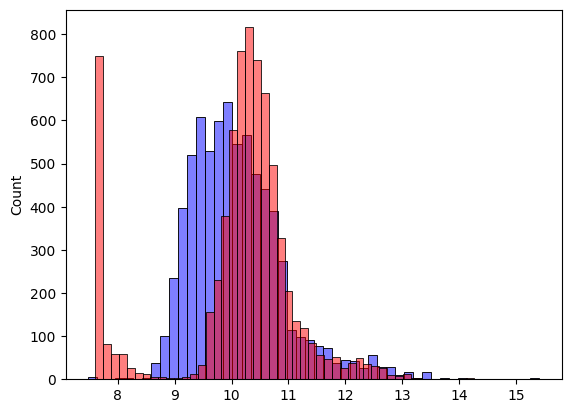

In [633]:
# checking the outcome of the y-pred vs the y_train
sns.histplot(y_pred, color='blue', alpha=0.5, bins=50)
sns.histplot(y_train, color='red', alpha=0.5, bins=50)


###  2.9 Root mean Squared Error
____

The RMSE is a measure of how well a regression model performs. It is the square root of the average of the squared differences between the predicted and actual values. The lower the RMSE, the better the model's performance.

In [634]:
# writing a function to calculate the RMSE
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [635]:
# calling the rmse function
rmse(y_train, y_pred)

0.7554192603920132

### 2.10 Using RMSE on validation data
___

X_val is a DataFrame that contains the validation data. It is a subset of the original data that is used to evaluate the model's performance. The model is trained on the training data and then tested on the validation data to see how well it generalizes to new data.

In [636]:
X_val = df_val_s[numerical_base]
X_val

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,200.0,4.0,25,19,1385
1,241.0,4.0,29,22,617
2,160.0,4.0,36,26,5657
3,290.0,6.0,34,21,204
4,170.0,4.0,34,25,873
...,...,...,...,...,...
2377,240.0,4.0,37,25,870
2378,444.0,8.0,20,13,238
2379,332.0,8.0,23,20,1624
2380,148.0,4.0,34,24,436


In [637]:
# filling the missing values in the val data with 0
X_val.isnull().sum()

engine_hp           16
engine_cylinders     7
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [638]:
# prepare a function to fill the missing values in the val data with 0
def prepare_X(df):
    df = df.copy()
    df = df[numerical_base]
    df = df.fillna(0)
    X = df.values
    return X

# calling the prepare_X function
X_val = prepare_X(df_val_s)

X_val


array([[2.000e+02, 4.000e+00, 2.500e+01, 1.900e+01, 1.385e+03],
       [2.410e+02, 4.000e+00, 2.900e+01, 2.200e+01, 6.170e+02],
       [1.600e+02, 4.000e+00, 3.600e+01, 2.600e+01, 5.657e+03],
       ...,
       [3.320e+02, 8.000e+00, 2.300e+01, 2.000e+01, 1.624e+03],
       [1.480e+02, 4.000e+00, 3.400e+01, 2.400e+01, 4.360e+02],
       [2.900e+02, 6.000e+00, 2.500e+01, 1.800e+01, 1.720e+03]])

In [639]:
# mutlipling the X_val with the w values
y_pred = w0 + X_val.dot(w)

In [640]:
# calling the rmse function
rmse(y_val, y_pred)

0.7616530991301608

### 2.11 Feature engineering
____

In [641]:
df_train_s

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,0,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,0,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86


We want to improve the RMSSe by adding more features to the model. We can do this by creating new features from the existing ones. For example, we can create a new feature by combining two existing features or by transforming an existing feature. The focus of this is too add the `year` feature to the model.

In [642]:
# checking the year column in the train data
df_train_s.year.max()

2017

In [643]:
# using the year column to calculate the age of the car
2017 - df_train_s['year']

0        9
1        5
2        1
3       26
4        0
        ..
7145     2
7146     2
7147     2
7148     3
7149     0
Name: year, Length: 7150, dtype: int64

In [644]:
# prepare a function to add age to the train data
# This copy the train data, and add the age column to the train data
# The age column is calculated by subtracting the year column from 2017
def prepare_X(df):
    df = df.copy()
    df['age'] = 2017 - df['year']
    df = df[numerical_base + ['age']]
    df = df.fillna(0)
    X = df.values
    return X


In [645]:
# calling the prepare_X function on the train data in which the age column is added
X_train = prepare_X(df_train_s)

# using the improved X_train to trian the linear regression model again and calculate the RMSE
w0, w = train_linear_regression(X_train, y_train)


In [646]:
# checking the w0 and w values
print(w0)
print(w[0])
print(w[1])
print(w[2])
print(w[3])
print(w[4])

9.286850605505801
0.0038729654278254486
0.07248895320648037
-0.0025971237204872057
0.011044511990292681
-4.770156845037008e-05


In [647]:
# calling the prepare_X function on the val data in which the age column is added
X_val = prepare_X(df_val_s)

In [648]:
# calling the pred function y = w0 + w1x1 + w2x2 + w3x3 + w4x4 + w5x5
y_pred = w0 + X_val.dot(w)
y_pred

array([10.24392012, 10.64842189, 10.12029397, ..., 10.86361511,
       10.21280833, 10.71044038])

In [649]:
# calling the rmse function
rmse(y_val, y_pred)

0.5172055461058325

<Axes: ylabel='Count'>

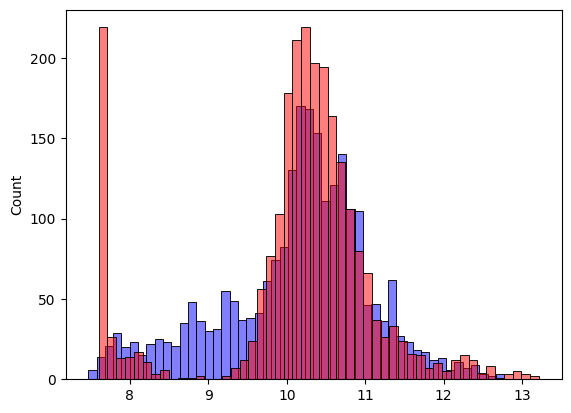

In [650]:
# checking the outcome of the y-pred vs the y_train
sns.histplot(y_pred, color='blue', alpha=0.5, bins=50)
sns.histplot(y_val, color='red', alpha=0.5, bins=50)

### 2.14 Categorical variables
____

In [651]:
categorical_columns = [
    'make', 'model', 'engine_fuel_type', 'driven_wheels', 'market_category',
    'vehicle_size', 'vehicle_style']

categorical = {}

for c in categorical_columns:
    categorical[c] = list(df_train_s[c].value_counts().head().index)

In [652]:
def prepare_X(df):
    df = df.copy()

    df['age'] = 2017 - df['year']
    features = numerical_base + ['age']

    for v in [2, 3, 4]:
        df['num_doors_%d' % v] = (df.number_of_doors == v).astype(int)
        features.append('num_doors_%d' % v)

    for name, values in categorical.items():
        for value in values:
            df['%s_%s' % (name, value)] = (df[name] == value).astype(int)
            features.append('%s_%s' % (name, value))

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [653]:
X_train = prepare_X(df_train_s)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

290.3835137851096

In [654]:
w0, w

(2044556747440041.5,
 array([-9.00662894e-01, -1.06572723e+02, -2.01787048e+01, -2.58697347e+01,
         2.04471103e-03, -1.53215944e+01, -1.61679634e+04, -1.63282308e+04,
        -1.61936577e+04,  9.30300394e+00, -2.74939224e+01, -5.95834319e+01,
        -1.80372669e+01, -1.18263228e+01,  4.03230388e+01,  3.58869450e+01,
         6.88922839e+01,  5.63384145e+01,  4.47879005e+02, -1.82486739e+03,
        -1.69483157e+03, -1.81792396e+03, -1.91212622e+03, -1.68443449e+03,
        -2.04455675e+15, -2.04455675e+15, -2.04455675e+15, -2.04455675e+15,
        -1.11544273e+01,  4.76709334e-01, -8.24876401e+00, -1.12958487e+01,
        -4.82337432e+01, -1.25886541e+02, -9.88344949e+01, -7.27357085e+01,
        -1.46624926e-01, -2.67471388e-02,  1.74518903e-01,  3.63838446e-01,
        -2.95393093e-01]))

### 2.15 Regularization
____

In [657]:
X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5.00000001],
]

X = np.array(X)
X

array([[4.        , 4.        , 4.        ],
       [3.        , 5.        , 5.        ],
       [5.        , 1.        , 1.        ],
       [5.        , 4.        , 4.        ],
       [7.        , 5.        , 5.        ],
       [4.        , 5.        , 5.00000001]])

In [658]:
XTX = X.T.dot(X)
XTX

array([[140.        , 111.        , 111.00000004],
       [111.        , 108.        , 108.00000005],
       [111.00000004, 108.00000005, 108.0000001 ]])

In [660]:
XTX_inv = np.linalg.inv(XTX)
XTX_inv

array([[ 3.85321698e-02,  1.20696657e+05, -1.20696686e+05],
       [ 1.20696640e+05, -2.74658839e+14,  2.74658839e+14],
       [-1.20696680e+05,  2.74658839e+14, -2.74658839e+14]])

In [661]:
y= [1, 2, 3, 1, 2, 3]

In [662]:
XTX_inv.dot(X.T).dot(y)

array([ 8.39894892e-01,  3.44329390e+06, -3.44329299e+06])

In [663]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [673]:
X_train = prepare_X(df_train_s)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_val_s)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.4604527862469971

#### 2.15 Tuning the model
___

In [677]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10]:
    X_train = prepare_X(df_train_s)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val_s)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)

    print(r, w0, score)

0.0 2044556747440041.5 256.964723259173
1e-05 6.915095952802436 0.4604472198053108
0.0001 7.144228328039388 0.4604472866510015
0.001 7.13801896974353 0.46044778305468825
0.1 7.006936713235581 0.4605064149087109
1 6.255034371293664 0.4612568942391993
10 4.719437507275206 0.4737973324928617


In [676]:
r = 0.001
X_train = prepare_X(df_train_s)
w0, w = train_linear_regression_reg(X_train, y_train, r=r)

X_val = prepare_X(df_val_s)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)
score

0.46044778305468825